In [1]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#loading the day.csv file
bike_rent= pd.read_csv("day.csv")


In [4]:
bike_rent.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bike_rent.shape


(730, 16)

In [6]:
bike_rent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_rent.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
bike_rent['dteday'].dtype


dtype('O')

In [9]:
# From dteday we will make it into a better format
bike_rent['dteday'] =  pd.to_datetime(bike_rent['dteday'],format='%d-%m-%Y')

In [10]:
# Here we will extract year and month from dteday  
bike_rent['year'] = pd.DatetimeIndex(bike_rent['dteday']).year
bike_rent['month'] = pd.DatetimeIndex(bike_rent['dteday']).month

In [11]:
bike_rent.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        1           1   
1        2 2018-01-02       1   0     1        0        2           1   
2        3 2018-01-03       1   0     1        0        3           1   
3        4 2018-01-04       1   0     1        0        4           1   
4        5 2018-01-05       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  year  month  
0   985  2018      1  
1   801  2018      1  
2  1349  2018      1  
3  1562  2018      1  
4  1600  2018      1

In [12]:
#We will drp yr and mnth as we have extracted it from dteday  
bike_rent.drop(['yr','mnth'],axis=1,inplace=True)

In [13]:
bike_rent.head()

instant     dteday  season  holiday  weekday  workingday  weathersit  \
0        1 2018-01-01       1        0        1           1           2   
1        2 2018-01-02       1        0        2           1           2   
2        3 2018-01-03       1        0        3           1           1   
3        4 2018-01-04       1        0        4           1           1   
4        5 2018-01-05       1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  year  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985  2018   
1  14.902598  17.68695  69.6087  16.652113     131         670   801  2018   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  2018   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  2018   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600  2018   

   month  
0      1  
1      1  
2      1  
3      1  
4      1

In [14]:

bike_rent.drop('holiday',axis=1,inplace=True)

In [15]:
bike_rent.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)


In [16]:
bike_rent.head()

season  weekday  workingday  weathersit       temp     atemp      hum  \
0       1        1           1           2  14.110847  18.18125  80.5833   
1       1        2           1           2  14.902598  17.68695  69.6087   
2       1        3           1           1   8.050924   9.47025  43.7273   
3       1        4           1           1   8.200000  10.60610  59.0435   
4       1        5           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  year  month  
0  10.749882   985  2018      1  
1  16.652113   801  2018      1  
2  16.636703  1349  2018      1  
3  10.739832  1562  2018      1  
4  12.522300  1600  2018      1

### Here we will be changing and encoding the labels from the data provided

In [17]:

bike_rent.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [18]:
seasons = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_rent['season'] = bike_rent['season'].map(seasons)

In [19]:
Weather = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike_rent['weathersit'] = bike_rent['weathersit'].map(Weather)

In [20]:
workday = {1:'working_day',0:'Holiday'}
bike_rent['workingday'] = bike_rent['workingday'].map(workday)

In [21]:
Year = {2019:1,2018:0}
bike_rent['year'] = bike_rent['year'].map(Year)

In [22]:
Months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_rent['month'] = bike_rent['month'].map(Months)

In [23]:
Weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_rent['weekday'] = bike_rent['weekday'].map(Weekdays)

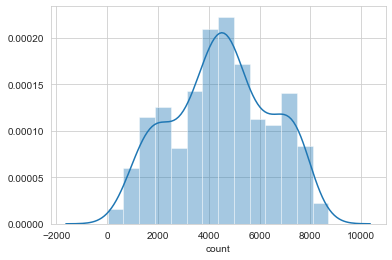

In [24]:
sns.set_style("whitegrid")
sns.distplot(bike_rent['count'])
plt.show()

In [25]:
bike_rent

season weekday   workingday weathersit       temp     atemp  humidity  \
0    spring     Tue  working_day       Mist  14.110847  18.18125   80.5833   
1    spring     Wed  working_day       Mist  14.902598  17.68695   69.6087   
2    spring     Thu  working_day      Clear   8.050924   9.47025   43.7273   
3    spring     Fri  working_day      Clear   8.200000  10.60610   59.0435   
4    spring     Sat  working_day      Clear   9.305237  11.46350   43.6957   
..      ...     ...          ...        ...        ...       ...       ...   
725  spring     Sat  working_day       Mist  10.420847  11.33210   65.2917   
726  spring     Sun      Holiday       Mist  10.386653  12.75230   59.0000   
727  spring     Mon      Holiday       Mist  10.386653  12.12000   75.2917   
728  spring     Tue  working_day      Clear  10.489153  11.58500   48.3333   
729  spring     Wed  working_day       Mist   8.849153  11.17435   57.7500   

     windspeed  count  year month  
0    10.749882    985     0   Jan  
1    16.652113    801     0   Jan  
2    16.636703   1349     0   Jan  
3    10.739832   1562     0   Jan  
4    12.522300   1600     0   Jan  
..         ...    ...   ...   ...  
725  23.458911   2114     1   Dec  
726  10.416557   3095     1   Dec  
727   8.333661   1341     1   Dec  
728  23.500518   1796     1   Dec  
729  10.374682   2729     1   Dec  

[730 rows x 11 columns]

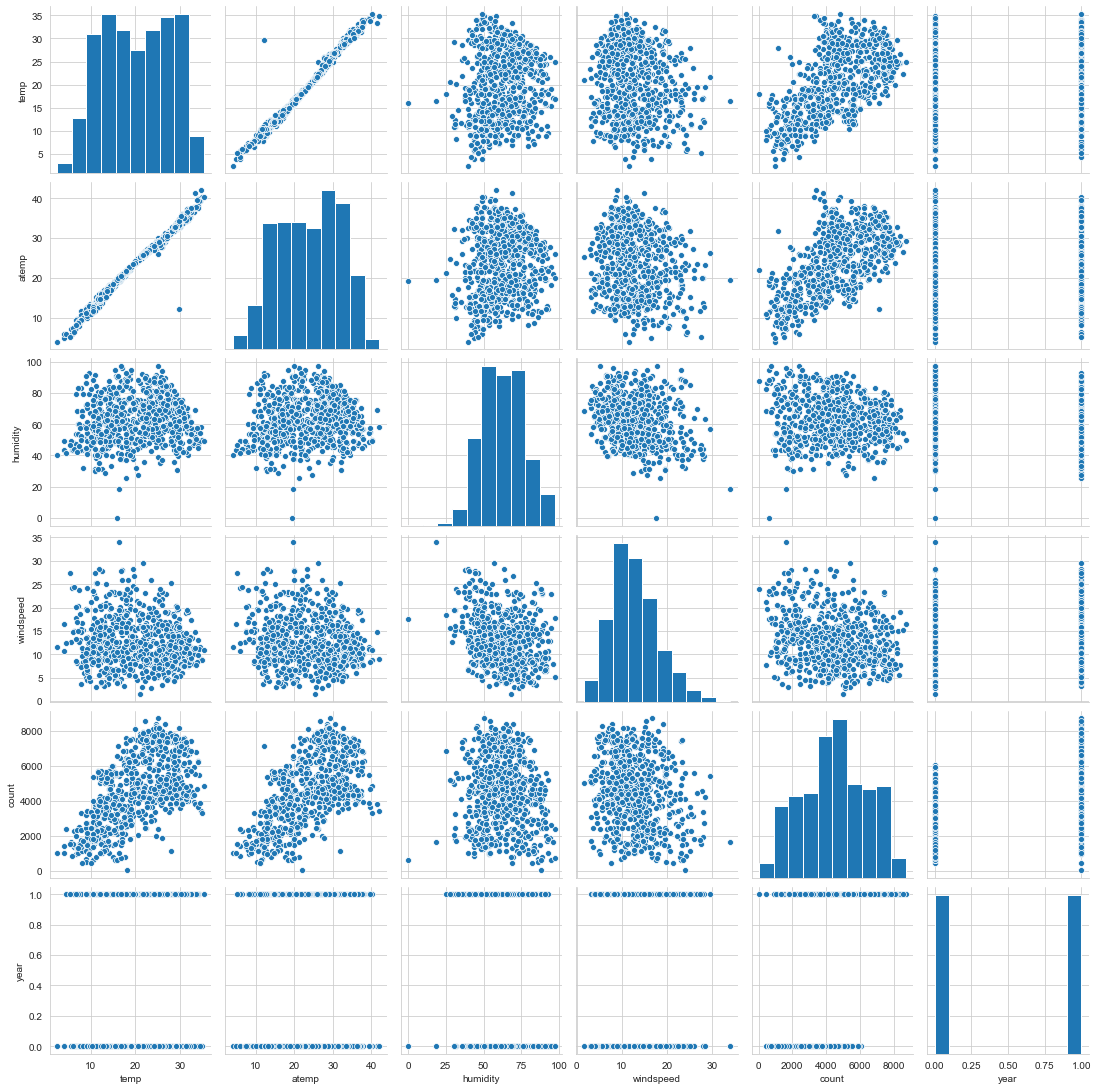

In [26]:
sns.pairplot(bike_rent)
plt.show()

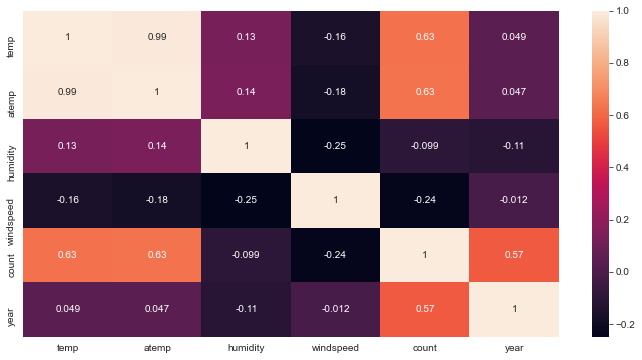

In [27]:
plt.figure(figsize = (12,6))
sns.heatmap(bike_rent.corr(),annot=True)
plt.show()

### We can see the temp and atemp are very highly correlated

In [28]:
#we will drop atemp as it is very much similar to temp
bike_rent.drop('atemp',axis=1,inplace=True)

In [29]:
bike_rent.head()

season weekday   workingday weathersit       temp  humidity  windspeed  \
0  spring     Tue  working_day       Mist  14.110847   80.5833  10.749882   
1  spring     Wed  working_day       Mist  14.902598   69.6087  16.652113   
2  spring     Thu  working_day      Clear   8.050924   43.7273  16.636703   
3  spring     Fri  working_day      Clear   8.200000   59.0435  10.739832   
4  spring     Sat  working_day      Clear   9.305237   43.6957  12.522300   

   count  year month  
0    985     0   Jan  
1    801     0   Jan  
2   1349     0   Jan  
3   1562     0   Jan  
4   1600     0   Jan

### We will deal with categorial variables by making them into dummy variables

In [30]:
seasons = pd.get_dummies(bike_rent['season'],drop_first=True)

working_day = pd.get_dummies(bike_rent['workingday'],drop_first=True)

weather= pd.get_dummies(bike_rent['weathersit'],drop_first=True)

month= pd.get_dummies(bike_rent['month'],drop_first=True)

week_day= pd.get_dummies(bike_rent['weekday'],drop_first=True)

In [31]:
bike_rent= pd.concat([bike_rent,seasons,working_day,weather,month,week_day],axis=1)

In [32]:
bike_rent.head()

season weekday   workingday weathersit       temp  humidity  windspeed  \
0  spring     Tue  working_day       Mist  14.110847   80.5833  10.749882   
1  spring     Wed  working_day       Mist  14.902598   69.6087  16.652113   
2  spring     Thu  working_day      Clear   8.050924   43.7273  16.636703   
3  spring     Fri  working_day      Clear   8.200000   59.0435  10.739832   
4  spring     Sat  working_day      Clear   9.305237   43.6957  12.522300   

   count  year month  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
0    985     0   Jan  ...    0    0    0    0    0    0    0    0    1    0  
1    801     0   Jan  ...    0    0    0    0    0    0    0    0    0    1  
2   1349     0   Jan  ...    0    0    0    0    0    0    0    1    0    0  
3   1562     0   Jan  ...    0    0    0    0    0    0    0    0    0    0  
4   1600     0   Jan  ...    0    0    0    0    0    1    0    0    0    0  

[5 rows x 33 columns]

In [33]:
# As we have made dummy variables which is appropriate for modelling we will drop the below varaibles
bike_rent.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [34]:
# we will split the data into train and test sets from sklearn
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_rent, train_size = 0.7, test_size = 0.3, random_state = 100)

### StandardScaler removes the mean and scales the data to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [36]:
num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

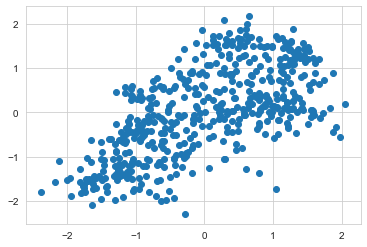

In [37]:
sns.set_style("whitegrid")
plt.scatter('temp','count',data=df_train)
plt.show()

In [38]:
y_train = df_train.pop('count')
X_train = df_train

### We will be using Recursive feature elimination(RFE) for automated Feature Selection approach which will make our task easier

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [43]:
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable to rfe
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.16e-176
Time:                        20:23:55   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1> R squared value is 81.6% which is pretty good.

2> The p-value is also under check.

In [47]:
X_train_new= X_train_rfe.drop('const',axis=1)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3  working_day  2.58
2       spring  2.10
0         temp  2.02
1         year  2.02
5         Mist  1.58
8          Mon  1.39
6         July  1.38
9          Sun  1.33
7          Sep  1.18
4   Light Snow  1.07

### The VIF value is under 5 which is very nice.

### Residual Analysis

In [49]:
y_train_pred = lm.predict(X_train_rfe)


Text(0.5, 0, 'Errors')

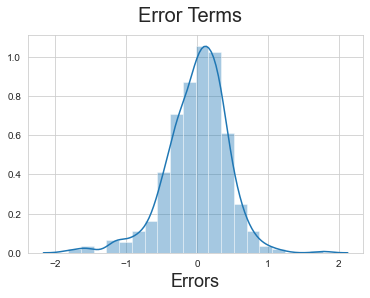

In [50]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Making Predictions

In [51]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])


In [52]:
y_test = df_test.pop('count')
X_test = df_test

In [53]:
X_test_new = X_test[X_train_new.columns]

In [54]:
X_test_new = sm.add_constant(X_test_new)

In [55]:
y_test_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'Predictions')

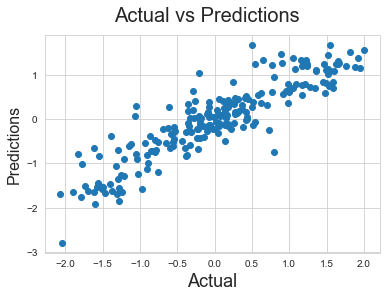

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)      
plt.xlabel('Actual', fontsize=18)   
plt.ylabel('Predictions', fontsize=16)                          

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8051381112407532